In [113]:
using Plots, Zygote

## Lecture 5
We shall be doing Linear Regression, Backpropogation, Multilayer Perceptron models, training
### Linear Regression
Let us define our own dataset. We will try approximating our function to `f(x) = 3x + 4`.

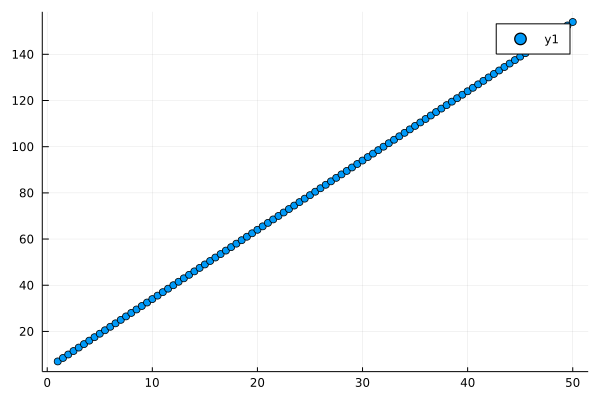

In [114]:
x = collect(1:0.5:50)
y = map(x->3x+4, x)
plot(x,y,seriestype = :scatter)

Our data is now ready. The variable `x` stores the inputs of our function and `y` stores the ground truth/target we need to obtain for each `x` we have. Let us define a random linear functions whose parameters we need to optimize. 

In [115]:
f(x,w₁,b₁) = w₁*x + b₁
loss(y,t) = (y-t)^2/2

loss (generic function with 1 method)

The function `f` has two trainable parameters - `w₁` and `b₁`. The target we need to achieve is `w₁ = 3` and `b₁ = 4`. Let us first define the `w₁` and `b₁` parameters randomly at first.

In [116]:
w = 2.5; b = 4.5;
w,b

(2.5, 4.5)

We will use gradient descent as described in the last lecture. Let us write the training loop.

In [148]:
w = rand(); b = rand();
η = 1e-5
while true
    net_loss = 0
    grad_w = 0
    grad_b = 0
    for i = 1:length(x)
        # loss calculation
        t = f(x[i], w, b)
        net_loss += loss(t, y[i])
        grad_w += x[i]*(y[i]-t)
        grad_b += y[i]-t
#         w = w - η*grad_w
#         b = b - η*grad_b
    end
    # updation
    w = w + η*grad_w/length(x)
    b = b + η*grad_b/length(x)
    net_loss = net_loss/length(x)
    println("Loss: ",net_loss)
    if net_loss < 0.5
        break
    end
end

Loss: 3871.6886293083408
Loss: 3805.775194169924
Loss: 3740.984292772553
Loss: 3677.2968078888994
Loss: 3614.693947866157
Loss: 3553.157241081359
Loss: 3492.6685304911393
Loss: 3433.2099682743124
Loss: 3374.764010565678
Loss: 3317.3134122795263
Loss: 3260.841222021299
Loss: 3205.3307770859014
Loss: 3150.765698541194
Loss: 3097.1298863952234
Loss: 3044.4075148457523
Loss: 2992.583027610692
Loss: 2941.6411333380524
Loss: 2891.566801094082
Loss: 2842.345255928221
Loss: 2793.961974513612
Loss: 2746.402680861829
Loss: 2699.6533421106105
Loss: 2653.700164383306
Loss: 2608.5295887188545
Loss: 2564.1282870710756
Loss: 2520.4831583760865
Loss: 2477.581324686696
Loss: 2435.4101273726365
Loss: 2393.9571233854977
Loss: 2353.2100815872823
Loss: 2313.1569791414754
Loss: 2273.785997965589
Loss: 2235.0855212441024
Loss: 2197.044130000815
Loss: 2159.650599729544
Loss: 2122.893897082228
Loss: 2086.763176613414
Loss: 2051.247777580206
Loss: 2016.3372207966927
Loss: 1982.0212055419586
Loss: 1948.289606520

Loss: 4.200556425260064
Loss: 4.1520428368902635
Loss: 4.104355345642232
Loss: 4.057479882730943
Loss: 4.01140261896875
Loss: 3.9661099606850145
Loss: 3.9215885457150375
Loss: 3.877825239457499
Loss: 3.8348071309989136
Loss: 3.7925215293041576
Loss: 3.7509559594718493
Loss: 3.7100981590534596
Loss: 3.6699360744351885
Loss: 3.6304578572813972
Loss: 3.5916518610387027
Loss: 3.553506637499382
Loss: 3.516010933423645
Loss: 3.479153687219139
Loss: 3.442924025677105
Loss: 3.4073112607642244
Loss: 3.3723048864688754
Loss: 3.3378945757012826
Loss: 3.304070177246466
Loss: 3.270821712768877
Loss: 3.2381393738683366
Loss: 3.2060135191858548
Loss: 3.174434671558898
Loss: 3.143393515225055
Loss: 3.1128808930733247
Loss: 3.0828878039421355
Loss: 3.0534053999635957
Loss: 3.024424983952764
Loss: 2.995938006841411
Loss: 2.9679360651556443
Loss: 2.94041089853625
Loss: 2.913354387301477
Loss: 2.886758550051237
Loss: 2.860615541312006
Loss: 2.8349176492220773
Loss: 2.8096572932559813
Loss: 2.7848270219878

Loss: 1.3496789559321227
Loss: 1.3496626708552457
Loss: 1.3496465534455702
Loss: 1.3496306008481782
Loss: 1.3496148102567733
Loss: 1.3495991789128374
Loss: 1.3495837041048546
Loss: 1.3495683831674647
Loss: 1.3495532134807091
Loss: 1.3495381924692549
Loss: 1.3495233176016255
Loss: 1.3495085863894438
Loss: 1.3494939963867272
Loss: 1.349479545189142
Loss: 1.349465230433297
Loss: 1.3494510497960506
Loss: 1.3494370009938383
Loss: 1.3494230817819741
Loss: 1.3494092899540033
Loss: 1.3493956233410467
Loss: 1.3493820798111655
Loss: 1.3493686572687194
Loss: 1.3493553536537746
Loss: 1.3493421669414625
Loss: 1.3493290951414072
Loss: 1.349316136297123
Loss: 1.3493032884854488
Loss: 1.3492905498159862
Loss: 1.3492779184305086
Loss: 1.3492653925024554
Loss: 1.3492529702363647
Loss: 1.349240649867349
Loss: 1.34922842966058
Loss: 1.3492163079107762
Loss: 1.3492042829417068
Loss: 1.3491923531056698
Loss: 1.3491805167830249
Loss: 1.349168772381741
Loss: 1.3491571183368694
Loss: 1.34914555311013
Loss: 1.3

Loss: 1.3464436315167505
Loss: 1.3464371943113091
Loss: 1.3464307572756893
Loss: 1.3464243204075315
Loss: 1.3464178837044984
Loss: 1.3464114471643076
Loss: 1.3464050107847054
Loss: 1.3463985745634788
Loss: 1.3463921384984439
Loss: 1.346385702587489
Loss: 1.3463792668284824
Loss: 1.346372831219385
Loss: 1.3463663957581444
Loss: 1.3463599604427816
Loss: 1.3463535252713288
Loss: 1.3463470902418535
Loss: 1.3463406553524684
Loss: 1.3463342206013027
Loss: 1.3463277859865341
Loss: 1.3463213515063508
Loss: 1.3463149171589939
Loss: 1.3463084829427205
Loss: 1.3463020488558186
Loss: 1.3462956148966052
Loss: 1.3462891810634363
Loss: 1.34628274735468
Loss: 1.346276313768743
Loss: 1.346269880304064
Loss: 1.3462634469590913
Loss: 1.3462570137323042
Loss: 1.3462505806222218
Loss: 1.3462441476273805
Loss: 1.3462377147463294
Loss: 1.3462312819776667
Loss: 1.346224849319989
Loss: 1.346218416771941
Loss: 1.346211984332169
Loss: 1.3462055519993494
Loss: 1.3461991197721874
Loss: 1.3461926876494115
Loss: 1.3

Loss: 1.3437841539616862
Loss: 1.343777737615318
Loss: 1.3437713212996913
Loss: 1.3437649050148255
Loss: 1.343758488760693
Loss: 1.3437520725373098
Loss: 1.3437456563446726
Loss: 1.3437392401827715
Loss: 1.3437328240516087
Loss: 1.3437264079511806
Loss: 1.343719991881492
Loss: 1.343713575842536
Loss: 1.3437071598343058
Loss: 1.34370074385681
Loss: 1.3436943279100362
Loss: 1.3436879119939915
Loss: 1.3436814961086687
Loss: 1.3436750802540718
Loss: 1.343668664430199
Loss: 1.3436622486370393
Loss: 1.3436558328745998
Loss: 1.3436494171428757
Loss: 1.3436430014418663
Loss: 1.3436365857715642
Loss: 1.3436301701319824
Loss: 1.3436237545231122
Loss: 1.343617338944941
Loss: 1.3436109233974778
Loss: 1.3436045078807284
Loss: 1.3435980923946758
Loss: 1.343591676939336
Loss: 1.3435852615146882
Loss: 1.3435788461207414
Loss: 1.3435724307574983
Loss: 1.3435660154249525
Loss: 1.3435596001231
Loss: 1.343553184851944
Loss: 1.3435467696114818
Loss: 1.3435403544017135
Loss: 1.3435339392226322
Loss: 1.34352

Loss: 1.3411304063963203
Loss: 1.3411240027277942
Loss: 1.3411175990898523
Loss: 1.3411111954824806
Loss: 1.3411047919056822
Loss: 1.3410983883594614
Loss: 1.3410919848438212
Loss: 1.3410855813587508
Loss: 1.341079177904262
Loss: 1.3410727744803468
Loss: 1.341066371087005
Loss: 1.3410599677242412
Loss: 1.3410535643920454
Loss: 1.3410471610904342
Loss: 1.3410407578193957
Loss: 1.3410343545789274
Loss: 1.3410279513690342
Loss: 1.3410215481897196
Loss: 1.341015145040976
Loss: 1.3410087419228056
Loss: 1.341002338835213
Loss: 1.3409959357781907
Loss: 1.3409895327517407
Loss: 1.3409831297558674
Loss: 1.3409767267905648
Loss: 1.3409703238558341
Loss: 1.3409639209516777
Loss: 1.3409575180780977
Loss: 1.3409511152350897
Loss: 1.3409447124226492
Loss: 1.3409383096407856
Loss: 1.3409319068894903
Loss: 1.34092550416877
Loss: 1.3409191014786246
Loss: 1.340912698819048
Loss: 1.3409062961900362
Loss: 1.3408998935916112
Loss: 1.34089349102374
Loss: 1.3408870884864523
Loss: 1.3408806859797333
Loss: 1.3

Loss: 1.3367191353344179
Loss: 1.3367127527289628
Loss: 1.3367063701539894
Loss: 1.3366999876094843
Loss: 1.3366936050954583
Loss: 1.3366872226119075
Loss: 1.3366808401588306
Loss: 1.3366744577362333
Loss: 1.336668075344112
Loss: 1.3366616929824562
Loss: 1.3366553106512866
Loss: 1.3366489283505807
Loss: 1.3366425460803577
Loss: 1.3366361638406004
Loss: 1.3366297816313195
Loss: 1.3366233994525205
Loss: 1.3366170173041871
Loss: 1.33661063518633
Loss: 1.336604253098949
Loss: 1.336597871042038
Loss: 1.3365914890155977
Loss: 1.3365851070196357
Loss: 1.3365787250541472
Loss: 1.3365723431191272
Loss: 1.3365659612145853
Loss: 1.3365595793405092
Loss: 1.3365531974969085
Loss: 1.3365468156837803
Loss: 1.3365404339011273
Loss: 1.3365340521489368
Loss: 1.336527670427227
Loss: 1.336521288735983
Loss: 1.336514907075216
Loss: 1.3365085254449232
Loss: 1.3365021438450928
Loss: 1.3364957622757387
Loss: 1.3364893807368514
Loss: 1.3364829992284384
Loss: 1.3364766177504936
Loss: 1.3364702363030212
Loss: 1.

Loss: 1.3340793403801003
Loss: 1.334072970379219
Loss: 1.3340666004087522
Loss: 1.3340602304687
Loss: 1.3340538605590626
Loss: 1.3340474906798414
Loss: 1.334041120831031
Loss: 1.3340347510126438
Loss: 1.3340283812246665
Loss: 1.334022011467105
Loss: 1.334015641739957
Loss: 1.3340092720432224
Loss: 1.3340029023769069
Loss: 1.333996532740998
Loss: 1.3339901631355098
Loss: 1.3339837935604302
Loss: 1.3339774240157722
Loss: 1.333971054501519
Loss: 1.333964685017681
Loss: 1.3339583155642587
Loss: 1.333951946141247
Loss: 1.3339455767486506
Loss: 1.3339392073864662
Loss: 1.33393283805469
Loss: 1.3339264687533317
Loss: 1.333920099482382
Loss: 1.3339137302418522
Loss: 1.3339073610317267
Loss: 1.3339009918520124
Loss: 1.3338946227027189
Loss: 1.3338882535838303
Loss: 1.3338818844953537
Loss: 1.3338755154372879
Loss: 1.3338691464096353
Loss: 1.3338627774123875
Loss: 1.333856408445558
Loss: 1.3338500395091366
Loss: 1.333843670603122
Loss: 1.3338373017275247
Loss: 1.333830932882331
Loss: 1.333824564

Loss: 1.3294500192813785
Loss: 1.3294436713847102
Loss: 1.3294373235183579
Loss: 1.329430975682308
Loss: 1.3294246278765693
Loss: 1.3294182801011454
Loss: 1.3294119323560323
Loss: 1.3294055846412194
Loss: 1.3293992369567245
Loss: 1.3293928893025382
Loss: 1.3293865416786523
Loss: 1.3293801940850807
Loss: 1.32937384652182
Loss: 1.3293674989888657
Loss: 1.3293611514862198
Loss: 1.3293548040138838
Loss: 1.3293484565718496
Loss: 1.3293421091601259
Loss: 1.3293357617787191
Loss: 1.3293294144276118
Loss: 1.3293230671068088
Loss: 1.329316719816321
Loss: 1.3293103725561335
Loss: 1.3293040253262614
Loss: 1.3292976781266912
Loss: 1.3292913309574308
Loss: 1.3292849838184682
Loss: 1.3292786367098202
Loss: 1.3292722896314764
Loss: 1.3292659425834377
Loss: 1.3292595955657127
Loss: 1.3292532485782838
Loss: 1.3292469016211614
Loss: 1.329240554694351
Loss: 1.329234207797839
Loss: 1.3292278609316395
Loss: 1.3292215140957433
Loss: 1.3292151672901438
Loss: 1.3292088205148573
Loss: 1.3292024737698738
Loss: 

Loss: 1.32682457960587
Loss: 1.3268182442452312
Loss: 1.326811908914841
Loss: 1.3268055736147033
Loss: 1.326799238344814
Loss: 1.3267929031051708
Loss: 1.326786567895779
Loss: 1.3267802327166418
Loss: 1.3267738975677528
Loss: 1.3267675624491082
Loss: 1.3267612273607161
Loss: 1.3267548923025687
Loss: 1.3267485572746764
Loss: 1.3267422222770289
Loss: 1.3267358873096342
Loss: 1.3267295523724782
Loss: 1.326723217465576
Loss: 1.326716882588921
Loss: 1.326710547742521
Loss: 1.3267042129263649
Loss: 1.326697878140455
Loss: 1.3266915433847917
Loss: 1.3266852086593723
Loss: 1.3266788739642101
Loss: 1.3266725392992875
Loss: 1.3266662046646118
Loss: 1.3266598700601855
Loss: 1.3266535354860012
Loss: 1.3266472009420676
Loss: 1.3266408664283815
Loss: 1.3266345319449433
Loss: 1.3266281974917473
Loss: 1.3266218630687965
Loss: 1.3266155286760934
Loss: 1.326609194313632
Loss: 1.3266028599814255
Loss: 1.3265965256794572
Loss: 1.326590191407737
Loss: 1.326583857166256
Loss: 1.3265775229550296
Loss: 1.3265

Loss: 1.323698592171679
Loss: 1.3236922717370916
Loss: 1.3236859513326913
Loss: 1.3236796309584615
Loss: 1.323673310614409
Loss: 1.323666990300546
Loss: 1.3236606700168507
Loss: 1.3236543497633357
Loss: 1.3236480295400057
Loss: 1.3236417093468458
Loss: 1.3236353891838704
Loss: 1.3236290690510684
Loss: 1.323622748948447
Loss: 1.3236164288759997
Loss: 1.3236101088337264
Loss: 1.3236037888216403
Loss: 1.323597468839722
Loss: 1.3235911488879892
Loss: 1.3235848289664227
Loss: 1.3235785090750425
Loss: 1.3235721892138306
Loss: 1.323565869382804
Loss: 1.3235595495819426
Loss: 1.3235532298112664
Loss: 1.3235469100707569
Loss: 1.3235405903604334
Loss: 1.3235342706802808
Loss: 1.3235279510303015
Loss: 1.3235216314104976
Loss: 1.323515311820877
Loss: 1.3235089922614225
Loss: 1.3235026727321413
Loss: 1.3234963532330382
Loss: 1.3234900337641113
Loss: 1.323483714325358
Loss: 1.3234773949167802
Loss: 1.3234710755383732
Loss: 1.323464756190144
Loss: 1.3234584368720832
Loss: 1.3234521175842004
Loss: 1.3

Loss: 1.3210845105951616
Loss: 1.3210782026423709
Loss: 1.3210718947196969
Loss: 1.3210655868271428
Loss: 1.3210592789647146
Loss: 1.3210529711323986
Loss: 1.321046663330204
Loss: 1.3210403555581205
Loss: 1.3210340478161637
Loss: 1.3210277401043238
Loss: 1.3210214324226073
Loss: 1.3210151247709987
Loss: 1.3210088171495087
Loss: 1.3210025095581426
Loss: 1.3209962019968944
Loss: 1.3209898944657608
Loss: 1.3209835869647428
Loss: 1.3209772794938484
Loss: 1.320970972053062
Loss: 1.3209646646423991
Loss: 1.3209583572618537
Loss: 1.3209520499114196
Loss: 1.3209457425911055
Loss: 1.3209394353009103
Loss: 1.3209331280408254
Loss: 1.3209268208108615
Loss: 1.3209205136110107
Loss: 1.3209142064412758
Loss: 1.320907899301661
Loss: 1.3209015921921534
Loss: 1.3208952851127689
Loss: 1.320888978063496
Loss: 1.320882671044337
Loss: 1.3208763640552927
Loss: 1.32087005709637
Loss: 1.3208637501675584
Loss: 1.3208574432688593
Loss: 1.3208511364002737
Loss: 1.3208448295618027
Loss: 1.3208385227534503
Loss: 1

Loss: 1.3185952115179882
Loss: 1.31858891545117
Loss: 1.3185826194144188
Loss: 1.318576323407732
Loss: 1.3185700274311072
Loss: 1.3185637314845409
Loss: 1.3185574355680378
Loss: 1.318551139681597
Loss: 1.3185448438252207
Loss: 1.3185385479989067
Loss: 1.31853225220265
Loss: 1.3185259564364544
Loss: 1.318519660700322
Loss: 1.3185133649942538
Loss: 1.3185070693182386
Loss: 1.3185007736722922
Loss: 1.318494478056402
Loss: 1.3184881824705743
Loss: 1.3184818869148027
Loss: 1.3184755913890962
Loss: 1.3184692958934454
Loss: 1.318463000427858
Loss: 1.3184567049923295
Loss: 1.3184504095868619
Loss: 1.3184441142114558
Loss: 1.3184378188661012
Loss: 1.3184315235508122
Loss: 1.3184252282655797
Loss: 1.3184189330104061
Loss: 1.3184126377852967
Loss: 1.3184063425902377
Loss: 1.3184000474252375
Loss: 1.3183937522902964
Loss: 1.3183874571854186
Loss: 1.3183811621105985
Loss: 1.3183748670658355
Loss: 1.3183685720511271
Loss: 1.318362277066476
Loss: 1.318355982111882
Loss: 1.31834968718735
Loss: 1.31834

Loss: 1.3159912082579628
Loss: 1.3159849246248212
Loss: 1.3159786410216776
Loss: 1.315972357448543
Loss: 1.3159660739054067
Loss: 1.3159597903922793
Loss: 1.3159535069091515
Loss: 1.3159472234560234
Loss: 1.3159409400328994
Loss: 1.315934656639775
Loss: 1.3159283732766565
Loss: 1.315922089943545
Loss: 1.3159158066404255
Loss: 1.3159095233673175
Loss: 1.3159032401242006
Loss: 1.3158969569110888
Loss: 1.3158906737279807
Loss: 1.3158843905748723
Loss: 1.3158781074517634
Loss: 1.315871824358655
Loss: 1.3158655412955558
Loss: 1.315859258262451
Loss: 1.3158529752593444
Loss: 1.3158466922862424
Loss: 1.3158404093431344
Loss: 1.3158341264300315
Loss: 1.315827843546926
Loss: 1.3158215606938237
Loss: 1.3158152778707177
Loss: 1.315808995077615
Loss: 1.3158027123145064
Loss: 1.3157964295813942
Loss: 1.3157901468782927
Loss: 1.3157838642051785
Loss: 1.3157775815620671
Loss: 1.3157712989489574
Loss: 1.3157650163658445
Loss: 1.3157587338127235
Loss: 1.315752451289605
Loss: 1.315746168796489
Loss: 1.3

Loss: 1.3133860762413783
Loss: 1.313379805047294
Loss: 1.3133735338831565
Loss: 1.3133672627489603
Loss: 1.3133609916447064
Loss: 1.3133547205703962
Loss: 1.3133484495260357
Loss: 1.3133421785116106
Loss: 1.3133359075271342
Loss: 1.3133296365725924
Loss: 1.3133233656480015
Loss: 1.3133170947533515
Loss: 1.3133108238886415
Loss: 1.3133045530538752
Loss: 1.3132982822490564
Loss: 1.3132920114741724
Loss: 1.3132857407292358
Loss: 1.313279470014233
Loss: 1.3132731993291773
Loss: 1.3132669286740641
Loss: 1.3132606580488901
Loss: 1.313254387453658
Loss: 1.3132481168883656
Loss: 1.313241846353009
Loss: 1.3132355758476049
Loss: 1.3132293053721302
Loss: 1.3132230349266034
Loss: 1.3132167645110175
Loss: 1.3132104941253688
Loss: 1.313204223769658
Loss: 1.313197953443894
Loss: 1.3131916831480606
Loss: 1.3131854128821763
Loss: 1.3131791426462194
Loss: 1.3131728724402103
Loss: 1.3131666022641393
Loss: 1.3131603321180063
Loss: 1.3131540620018183
Loss: 1.3131477919155612
Loss: 1.3131415218592457
Loss: 

Loss: 1.3101666270986172
Loss: 1.310160371276854
Loss: 1.3101541154849592
Loss: 1.3101478597229328
Loss: 1.3101416039907863
Loss: 1.3101353482884996
Loss: 1.3101290926160891
Loss: 1.3101228369735458
Loss: 1.3101165813608726
Loss: 1.3101103257780675
Loss: 1.3101040702251365
Loss: 1.3100978147020643
Loss: 1.3100915592088729
Loss: 1.3100853037455487
Loss: 1.3100790483120877
Loss: 1.3100727929085005
Loss: 1.3100665375347749
Loss: 1.3100602821909213
Loss: 1.3100540268769345
Loss: 1.310047771592825
Loss: 1.3100415163385737
Loss: 1.3100352611141923
Loss: 1.3100290059196802
Loss: 1.310022750755035
Loss: 1.310016495620249
Loss: 1.3100102405153395
Loss: 1.3100039854402974
Loss: 1.3099977303951211
Loss: 1.309991475379806
Loss: 1.309985220394366
Loss: 1.309978965438791
Loss: 1.3099727105130756
Loss: 1.3099664556172315
Loss: 1.3099602007512525
Loss: 1.309953945915136
Loss: 1.3099476911088928
Loss: 1.309941436332509
Loss: 1.3099351815859908
Loss: 1.309928926869345
Loss: 1.3099226721825565
Loss: 1.30

Loss: 1.3075792688719672
Loss: 1.3075730254043927
Loss: 1.30756678196664
Loss: 1.3075605385586866
Loss: 1.3075542951805543
Loss: 1.3075480518322318
Loss: 1.3075418085137136
Loss: 1.3075355652250094
Loss: 1.3075293219661195
Loss: 1.3075230787370355
Loss: 1.3075168355377649
Loss: 1.3075105923683008
Loss: 1.307504349228649
Loss: 1.307498106118811
Loss: 1.3074918630387768
Loss: 1.3074856199885518
Loss: 1.3074793769681428
Loss: 1.30747313397754
Loss: 1.3074668910167424
Loss: 1.3074606480857573
Loss: 1.3074544051845842
Loss: 1.3074481623132146
Loss: 1.3074419194716564
Loss: 1.3074356766599027
Loss: 1.3074294338779613
Loss: 1.3074231911258298
Loss: 1.3074169484035016
Loss: 1.307410705710985
Loss: 1.3074044630482788
Loss: 1.307398220415376
Loss: 1.3073919778122836
Loss: 1.307385735238994
Loss: 1.3073794926955156
Loss: 1.3073732501818383
Loss: 1.30736700769797
Loss: 1.307360765243913
Loss: 1.307354522819664
Loss: 1.307348280425219
Loss: 1.3073420380605743
Loss: 1.3073357957257377
Loss: 1.307329

Loss: 1.3030170172967024
Loss: 1.3030107956131034
Loss: 1.3030045739592127
Loss: 1.3029983523350293
Loss: 1.3029921307405503
Loss: 1.3029859091757883
Loss: 1.3029796876407176
Loss: 1.302973466135367
Loss: 1.3029672446597125
Loss: 1.3029610232137772
Loss: 1.302954801797533
Loss: 1.3029485804110077
Loss: 1.3029423590541813
Loss: 1.3029361377270625
Loss: 1.3029299164296508
Loss: 1.3029236951619474
Loss: 1.3029174739239446
Loss: 1.3029112527156492
Loss: 1.3029050315370587
Loss: 1.3028988103881698
Loss: 1.3028925892689938
Loss: 1.3028863681795175
Loss: 1.3028801471197449
Loss: 1.3028739260896784
Loss: 1.302867705089312
Loss: 1.3028614841186534
Loss: 1.3028552631777008
Loss: 1.3028490422664525
Loss: 1.3028428213849046
Loss: 1.30283660053306
Loss: 1.3028303797109222
Loss: 1.3028241589184884
Loss: 1.3028179381557519
Loss: 1.3028117174227283
Loss: 1.3028054967194012
Loss: 1.3027992760457716
Loss: 1.3027930554018536
Loss: 1.302786834787633
Loss: 1.3027806142031149
Loss: 1.3027743936483038
Loss: 

Loss: 1.300443778344167
Loss: 1.3004375689473437
Loss: 1.3004313595801658
Loss: 1.3004251502426418
Loss: 1.30041894093477
Loss: 1.3004127316565381
Loss: 1.3004065224079573
Loss: 1.3004003131890283
Loss: 1.3003941039997475
Loss: 1.30038789484011
Loss: 1.3003816857101236
Loss: 1.3003754766097828
Loss: 1.3003692675390883
Loss: 1.300363058498042
Loss: 1.3003568494866415
Loss: 1.300350640504894
Loss: 1.300344431552788
Loss: 1.3003382226303273
Loss: 1.300332013737517
Loss: 1.3003258048743507
Loss: 1.300319596040833
Loss: 1.300313387236959
Loss: 1.3003071784627307
Loss: 1.3003009697181498
Loss: 1.3002947610032158
Loss: 1.3002885523179235
Loss: 1.30028234366228
Loss: 1.3002761350362826
Loss: 1.3002699264399293
Loss: 1.3002637178732181
Loss: 1.3002575093361548
Loss: 1.3002513008287349
Loss: 1.3002450923509614
Loss: 1.3002388839028316
Loss: 1.3002326754843418
Loss: 1.3002264670954993
Loss: 1.3002202587363045
Loss: 1.3002140504067456
Loss: 1.3002078421068408
Loss: 1.3002016338365696
Loss: 1.30019

Loss: 1.2968349175231297
Loss: 1.296828725358006
Loss: 1.2968225332224395
Loss: 1.296816341116445
Loss: 1.2968101490400137
Loss: 1.296803956993153
Loss: 1.2967977649758566
Loss: 1.296791572988125
Loss: 1.2967853810299572
Loss: 1.2967791891013574
Loss: 1.2967729972023239
Loss: 1.2967668053328503
Loss: 1.2967606134929495
Loss: 1.2967544216826101
Loss: 1.2967482299018311
Loss: 1.2967420381506252
Loss: 1.2967358464289804
Loss: 1.296729654736897
Loss: 1.2967234630743831
Loss: 1.2967172714414312
Loss: 1.2967110798380412
Loss: 1.2967048882642187
Loss: 1.2966986967199512
Loss: 1.2966925052052596
Loss: 1.296686313720122
Loss: 1.296680122264551
Loss: 1.2966739308385407
Loss: 1.2966677394420996
Loss: 1.2966615480752206
Loss: 1.2966553567379004
Loss: 1.2966491654301449
Loss: 1.2966429741519534
Loss: 1.2966367829033187
Loss: 1.296630591684245
Loss: 1.2966244004947374
Loss: 1.2966182093347955
Loss: 1.2966120182044085
Loss: 1.2966058271035852
Loss: 1.2965996360323286
Loss: 1.296593444990632
Loss: 1.2

Loss: 1.2942738871754957
Loss: 1.294267707238849
Loss: 1.294261527331709
Loss: 1.2942553474540794
Loss: 1.2942491676059567
Loss: 1.294242987787344
Loss: 1.2942368079982363
Loss: 1.2942306282386382
Loss: 1.2942244485085488
Loss: 1.2942182688079593
Loss: 1.2942120891368827
Loss: 1.2942059094953133
Loss: 1.294199729883243
Loss: 1.2941935503006885
Loss: 1.2941873707476403
Loss: 1.29418119122409
Loss: 1.2941750117300552
Loss: 1.2941688322655192
Loss: 1.294162652830495
Loss: 1.2941564734249729
Loss: 1.29415029404896
Loss: 1.2941441147024466
Loss: 1.2941379353854405
Loss: 1.2941317560979444
Loss: 1.2941255768399478
Loss: 1.294119397611455
Loss: 1.2941132184124744
Loss: 1.2941070392429939
Loss: 1.2941008601030155
Loss: 1.2940946809925475
Loss: 1.294088501911578
Loss: 1.2940823228601137
Loss: 1.2940761438381596
Loss: 1.294069964845702
Loss: 1.2940637858827495
Loss: 1.294057606949297
Loss: 1.2940514280453568
Loss: 1.294045249170913
Loss: 1.294039070325971
Loss: 1.294032891510541
Loss: 1.29402671

Loss: 1.2917117466987595
Loss: 1.2917055789958916
Loss: 1.291699411322475
Loss: 1.2916932436785138
Loss: 1.2916870760640036
Loss: 1.291680908478939
Loss: 1.2916747409233185
Loss: 1.2916685733971498
Loss: 1.2916624059004331
Loss: 1.291656238433166
Loss: 1.2916500709953467
Loss: 1.291643903586975
Loss: 1.2916377362080504
Loss: 1.2916315688585738
Loss: 1.291625401538543
Loss: 1.2916192342479678
Loss: 1.2916130669868302
Loss: 1.2916068997551493
Loss: 1.2916007325529117
Loss: 1.291594565380124
Loss: 1.29158839823678
Loss: 1.2915822311228853
Loss: 1.2915760640384306
Loss: 1.291569896983437
Loss: 1.2915637299578726
Loss: 1.29155756296177
Loss: 1.2915513959951055
Loss: 1.29154522905789
Loss: 1.2915390621501193
Loss: 1.2915328952717937
Loss: 1.2915267284229184
Loss: 1.2915205616034893
Loss: 1.2915143948135026
Loss: 1.2915082280529566
Loss: 1.2915020613218626
Loss: 1.2914958946202126
Loss: 1.2914897279480022
Loss: 1.2914835613052453
Loss: 1.2914773946919214
Loss: 1.2914712281080531
Loss: 1.29146

Loss: 1.2891669893019382
Loss: 1.2891608337498608
Loss: 1.2891546782271703
Loss: 1.2891485227338715
Loss: 1.2891423672699613
Loss: 1.2891362118354481
Loss: 1.289130056430323
Loss: 1.2891239010545896
Loss: 1.2891177457082506
Loss: 1.2891115903912935
Loss: 1.2891054351037317
Loss: 1.2890992798455667
Loss: 1.2890931246167812
Loss: 1.289086969417393
Loss: 1.2890808142473926
Loss: 1.2890746591067774
Loss: 1.2890685039955623
Loss: 1.2890623489137303
Loss: 1.2890561938612877
Loss: 1.2890500388382384
Loss: 1.2890438838445697
Loss: 1.2890377288803034
Loss: 1.2890315739454132
Loss: 1.2890254190399182
Loss: 1.289019264163806
Loss: 1.2890131093170938
Loss: 1.2890069544997604
Loss: 1.289000799711819
Loss: 1.2889946449532628
Loss: 1.2889884902240942
Loss: 1.288982335524317
Loss: 1.2889761808539255
Loss: 1.2889700262129202
Loss: 1.288963871601307
Loss: 1.2889577170190782
Loss: 1.2889515624662358
Loss: 1.2889454079427767
Loss: 1.28893925344871
Loss: 1.288933098984028
Loss: 1.2889269445487355
Loss: 1.2

Loss: 1.2858841037144992
Loss: 1.2858779638376296
Loss: 1.2858718239900877
Loss: 1.2858656841718568
Loss: 1.2858595443829437
Loss: 1.285853404623345
Loss: 1.2858472648930643
Loss: 1.2858411251920987
Loss: 1.2858349855204554
Loss: 1.285828845878117
Loss: 1.2858227062650982
Loss: 1.2858165666814008
Loss: 1.2858104271270163
Loss: 1.2858042876019444
Loss: 1.2857981481061895
Loss: 1.2857920086397479
Loss: 1.2857858692026207
Loss: 1.285779729794808
Loss: 1.2857735904163168
Loss: 1.2857674510671318
Loss: 1.2857613117472642
Loss: 1.2857551724567138
Loss: 1.285749033195476
Loss: 1.2857428939635518
Loss: 1.2857367547609375
Loss: 1.2857306155876385
Loss: 1.2857244764436555
Loss: 1.2857183373289844
Loss: 1.2857121982436273
Loss: 1.2857060591875842
Loss: 1.2856999201608534
Loss: 1.2856937811634341
Loss: 1.2856876421953265
Loss: 1.2856815032565296
Loss: 1.2856753643470509
Loss: 1.2856692254668776
Loss: 1.2856630866160235
Loss: 1.2856569477944766
Loss: 1.285650809002244
Loss: 1.2856446702393276
Loss:

Loss: 1.2834611322186844
Loss: 1.2834550039110986
Loss: 1.2834488756327693
Loss: 1.2834427473837045
Loss: 1.2834366191638966
Loss: 1.2834304909733516
Loss: 1.2834243628120705
Loss: 1.28341823468005
Loss: 1.2834121065772872
Loss: 1.283405978503787
Loss: 1.2833998504595487
Loss: 1.2833937224445724
Loss: 1.2833875944588515
Loss: 1.2833814665023933
Loss: 1.2833753385751945
Loss: 1.283369210677253
Loss: 1.2833630828085787
Loss: 1.283356954969159
Loss: 1.2833508271589946
Loss: 1.2833446993780966
Loss: 1.2833385716264536
Loss: 1.2833324439040699
Loss: 1.2833263162109492
Loss: 1.2833201885470802
Loss: 1.2833140609124727
Loss: 1.283307933307126
Loss: 1.2833018057310364
Loss: 1.2832956781842013
Loss: 1.2832895506666262
Loss: 1.2832834231783106
Loss: 1.2832772957192533
Loss: 1.2832711682894502
Loss: 1.283265040888912
Loss: 1.283258913517626
Loss: 1.2832527861755922
Loss: 1.2832466588628226
Loss: 1.283240531579306
Loss: 1.2832344043250468
Loss: 1.2832282771000456
Loss: 1.2832221499042975
Loss: 1.2

Loss: 1.2809326290769494
Loss: 1.2809265128425358
Loss: 1.2809203966373182
Loss: 1.2809142804613067
Loss: 1.2809081643144988
Loss: 1.2809020481968985
Loss: 1.2808959321084983
Loss: 1.2808898160492994
Loss: 1.2808837000193058
Loss: 1.2808775840185163
Loss: 1.280871468046924
Loss: 1.2808653521045408
Loss: 1.2808592361913647
Loss: 1.2808531203073794
Loss: 1.2808470044526008
Loss: 1.2808408886270295
Loss: 1.2808347728306528
Loss: 1.2808286570634793
Loss: 1.2808225413255117
Loss: 1.2808164256167454
Loss: 1.2808103099371766
Loss: 1.280804194286812
Loss: 1.2807980786656477
Loss: 1.2807919630736821
Loss: 1.28078584751092
Loss: 1.2807797319773548
Loss: 1.2807736164729984
Loss: 1.2807675009978376
Loss: 1.2807613855518807
Loss: 1.2807552701351146
Loss: 1.2807491547475598
Loss: 1.280743039389196
Loss: 1.2807369240600346
Loss: 1.280730808760077
Loss: 1.2807246934893173
Loss: 1.2807185782477561
Loss: 1.2807124630353934
Loss: 1.2807063478522283
Loss: 1.2807002326982673
Loss: 1.2806941175735016
Loss: 

Loss: 1.2784030030682645
Loss: 1.2783968989123737
Loss: 1.278390794785632
Loss: 1.2783846906880425
Loss: 1.2783785866195922
Loss: 1.278372482580293
Loss: 1.2783663785701336
Loss: 1.278360274589119
Loss: 1.278354170637258
Loss: 1.278348066714535
Loss: 1.2783419628209638
Loss: 1.2783358589565297
Loss: 1.2783297551212462
Loss: 1.2783236513151104
Loss: 1.2783175475381092
Loss: 1.2783114437902618
Loss: 1.2783053400715507
Loss: 1.2782992363819905
Loss: 1.2782931327215719
Loss: 1.2782870290903
Loss: 1.278280925488171
Loss: 1.2782748219151783
Loss: 1.2782687183713353
Loss: 1.2782626148566356
Loss: 1.2782565113710795
Loss: 1.278250407914664
Loss: 1.2782443044873941
Loss: 1.2782382010892648
Loss: 1.2782320977202855
Loss: 1.2782259943804404
Loss: 1.2782198910697387
Loss: 1.278213787788178
Loss: 1.2782076845357664
Loss: 1.2782015813124898
Loss: 1.2781954781183618
Loss: 1.2781893749533666
Loss: 1.2781832718175192
Loss: 1.2781771687108165
Loss: 1.2781710656332441
Loss: 1.27816496258482
Loss: 1.27815

Loss: 1.2762561397354901
Loss: 1.2762500458305062
Loss: 1.2762439519546234
Loss: 1.2762378581078337
Loss: 1.276231764290144
Loss: 1.2762256705015556
Loss: 1.2762195767420585
Loss: 1.276213483011662
Loss: 1.2762073893103574
Loss: 1.2762012956381514
Loss: 1.2761952019950407
Loss: 1.2761891083810268
Loss: 1.2761830147961126
Loss: 1.2761769212402887
Loss: 1.276170827713556
Loss: 1.2761647342159321
Loss: 1.2761586407473966
Loss: 1.2761525473079556
Loss: 1.2761464538976084
Loss: 1.2761403605163613
Loss: 1.2761342671642057
Loss: 1.2761281738411463
Loss: 1.2761220805471767
Loss: 1.2761159872823058
Loss: 1.2761098940465325
Loss: 1.2761038008398469
Loss: 1.2760977076622595
Loss: 1.2760916145137622
Loss: 1.2760855213943605
Loss: 1.276079428304056
Loss: 1.276073335242841
Loss: 1.276067242210722
Loss: 1.27606114920769
Loss: 1.2760550562337558
Loss: 1.2760489632889167
Loss: 1.2760428703731674
Loss: 1.276036777486512
Loss: 1.2760306846289446
Loss: 1.2760245918004718
Loss: 1.2760184990010972
Loss: 1.2

Loss: 1.2737418309044883
Loss: 1.2737357490049048
Loss: 1.27372966713436
Loss: 1.2737235852928521
Loss: 1.2737175034803832
Loss: 1.273711421696959
Loss: 1.2737053399425733
Loss: 1.2736992582172266
Loss: 1.273693176520916
Loss: 1.273687094853643
Loss: 1.2736810132154146
Loss: 1.2736749316062237
Loss: 1.2736688500260687
Loss: 1.2736627684749515
Loss: 1.273656686952879
Loss: 1.2736506054598413
Loss: 1.273644523995842
Loss: 1.2736384425608787
Loss: 1.2736323611549576
Loss: 1.2736262797780673
Loss: 1.2736201984302171
Loss: 1.2736141171114055
Loss: 1.2736080358216335
Loss: 1.273601954560892
Loss: 1.2735958733291923
Loss: 1.2735897921265265
Loss: 1.2735837109529058
Loss: 1.2735776298083092
Loss: 1.2735715486927581
Loss: 1.273565467606239
Loss: 1.2735593865487627
Loss: 1.2735533055203117
Loss: 1.2735472245209043
Loss: 1.273541143550529
Loss: 1.2735350626091961
Loss: 1.273528981696887
Loss: 1.2735229008136222
Loss: 1.2735168199593885
Loss: 1.2735107391341938
Loss: 1.2735046583380356
Loss: 1.273

Loss: 1.2712324754278443
Loss: 1.2712264055099958
Loss: 1.2712203356211393
Loss: 1.271214265761265
Loss: 1.2712081959303676
Loss: 1.2712021261284534
Loss: 1.2711960563555311
Loss: 1.2711899866115757
Loss: 1.2711839168966113
Loss: 1.2711778472106303
Loss: 1.271171777553632
Loss: 1.2711657079256078
Loss: 1.2711596383265675
Loss: 1.2711535687565079
Loss: 1.2711474992154375
Loss: 1.271141429703336
Loss: 1.2711353602202227
Loss: 1.2711292907660912
Loss: 1.2711232213409331
Loss: 1.2711171519447653
Loss: 1.2711110825775727
Loss: 1.2711050132393586
Loss: 1.271098943930126
Loss: 1.2710928746498744
Loss: 1.2710868053986033
Loss: 1.2710807361763103
Loss: 1.271074666982995
Loss: 1.2710685978186629
Loss: 1.2710625286833057
Loss: 1.2710564595769287
Loss: 1.2710503904995367
Loss: 1.2710443214511191
Loss: 1.2710382524316786
Loss: 1.2710321834412206
Loss: 1.2710261144797315
Loss: 1.2710200455472302
Loss: 1.2710139766437076
Loss: 1.2710079077691567
Loss: 1.2710018389235822
Loss: 1.2709957701069954
Loss:

Loss: 1.2692067337807589
Loss: 1.2692006735354866
Loss: 1.2691946133191556
Loss: 1.2691885531317577
Loss: 1.269182492973294
Loss: 1.2691764328437625
Loss: 1.2691703727431725
Loss: 1.2691643126715229
Loss: 1.2691582526288006
Loss: 1.2691521926150162
Loss: 1.2691461326301714
Loss: 1.269140072674262
Loss: 1.2691340127472828
Loss: 1.2691279528492359
Loss: 1.26912189298013
Loss: 1.2691158331399608
Loss: 1.2691097733287262
Loss: 1.2691037135464212
Loss: 1.2690976537930565
Loss: 1.2690915940686232
Loss: 1.2690855343731189
Loss: 1.2690794747065555
Loss: 1.2690734150689225
Loss: 1.2690673554602283
Loss: 1.2690612958804628
Loss: 1.2690552363296281
Loss: 1.2690491768077314
Loss: 1.2690431173147663
Loss: 1.2690370578507348
Loss: 1.2690309984156367
Loss: 1.2690249390094686
Loss: 1.2690188796322357
Loss: 1.2690128202839395
Loss: 1.2690067609645659
Loss: 1.2690007016741338
Loss: 1.2689946424126253
Loss: 1.2689885831800538
Loss: 1.2689825239764185
Loss: 1.2689764648017097
Loss: 1.268970405655929
Loss:

Loss: 1.2656845588650776
Loss: 1.2656785154375931
Loss: 1.2656724720389594
Loss: 1.2656664286691879
Loss: 1.2656603853282635
Loss: 1.2656543420161999
Loss: 1.2656482987329891
Loss: 1.26564225547864
Loss: 1.2656362122531375
Loss: 1.265630169056503
Loss: 1.265624125888714
Loss: 1.2656180827497796
Loss: 1.2656120396397001
Loss: 1.2656059965584834
Loss: 1.2655999535061127
Loss: 1.2655939104826013
Loss: 1.2655878674879422
Loss: 1.2655818245221429
Loss: 1.2655757815851871
Loss: 1.2655697386770899
Loss: 1.2655636957978533
Loss: 1.2655576529474601
Loss: 1.2655516101259265
Loss: 1.265545567333249
Loss: 1.2655395245694163
Loss: 1.2655334818344428
Loss: 1.2655274391283187
Loss: 1.2655213964510528
Loss: 1.265515353802638
Loss: 1.2655093111830735
Loss: 1.265503268592365
Loss: 1.2654972260304997
Loss: 1.2654911834974993
Loss: 1.265485140993341
Loss: 1.2654790985180395
Loss: 1.265473056071588
Loss: 1.2654670136539914
Loss: 1.2654609712652394
Loss: 1.2654549289053478
Loss: 1.2654488865742988
Loss: 1.2

Loss: 1.263179013731876
Loss: 1.2631729822679372
Loss: 1.26316695083279
Loss: 1.2631609194264517
Loss: 1.2631548880489116
Loss: 1.263148856700169
Loss: 1.2631428253802228
Loss: 1.26313679408908
Loss: 1.2631307628267279
Loss: 1.2631247315931826
Loss: 1.2631187003884312
Loss: 1.2631126692124754
Loss: 1.263106638065325
Loss: 1.263100606946966
Loss: 1.2630945758574041
Loss: 1.263088544796642
Loss: 1.2630825137646762
Loss: 1.2630764827615089
Loss: 1.2630704517871372
Loss: 1.2630644208415645
Loss: 1.2630583899247885
Loss: 1.2630523590368015
Loss: 1.2630463281776194
Loss: 1.2630402973472334
Loss: 1.2630342665456433
Loss: 1.2630282357728433
Loss: 1.263022205028846
Loss: 1.263016174313639
Loss: 1.263010143627233
Loss: 1.2630041129696161
Loss: 1.262998082340802
Loss: 1.2629920517407751
Loss: 1.262986021169552
Loss: 1.2629799906271193
Loss: 1.2629739601134768
Loss: 1.2629679296286387
Loss: 1.2629618991725893
Loss: 1.2629558687453308
Loss: 1.2629498383468767
Loss: 1.2629438079772093
Loss: 1.262937

Loss: 1.2610577165346628
Loss: 1.2610516951995523
Loss: 1.2610456738931968
Loss: 1.261039652615597
Loss: 1.2610336313667367
Loss: 1.2610276101466376
Loss: 1.2610215889552774
Loss: 1.2610155677926715
Loss: 1.2610095466588196
Loss: 1.2610035255537149
Loss: 1.2609975044773625
Loss: 1.260991483429756
Loss: 1.2609854624109014
Loss: 1.260979441420793
Loss: 1.260973420459442
Loss: 1.2609673995268311
Loss: 1.2609613786229672
Loss: 1.2609553577478567
Loss: 1.260949336901498
Loss: 1.2609433160838832
Loss: 1.2609372952950213
Loss: 1.2609312745349048
Loss: 1.2609252538035391
Loss: 1.260919233100917
Loss: 1.2609132124270406
Loss: 1.260907191781918
Loss: 1.2609011711655402
Loss: 1.2608951505779087
Loss: 1.2608891300190281
Loss: 1.2608831094888906
Loss: 1.2608770889875034
Loss: 1.2608710685148614
Loss: 1.260865048070967
Loss: 1.2608590276558154
Loss: 1.2608530072694153
Loss: 1.2608469869117576
Loss: 1.2608409665828493
Loss: 1.2608349462826882
Loss: 1.2608289260112728
Loss: 1.2608229057685973
Loss: 1.

Loss: 1.2585733496005027
Loss: 1.2585673401278175
Loss: 1.2585613306838366
Loss: 1.2585553212685452
Loss: 1.2585493118819466
Loss: 1.258543302524044
Loss: 1.2585372931948307
Loss: 1.258531283894319
Loss: 1.2585252746224915
Loss: 1.258519265379366
Loss: 1.2585132561649226
Loss: 1.25850724697918
Loss: 1.2585012378221303
Loss: 1.2584952286937714
Loss: 1.258489219594109
Loss: 1.2584832105231345
Loss: 1.258477201480854
Loss: 1.2584711924672618
Loss: 1.2584651834823681
Loss: 1.2584591745261635
Loss: 1.258453165598647
Loss: 1.2584471566998228
Loss: 1.2584411478296977
Loss: 1.2584351389882538
Loss: 1.2584291301755102
Loss: 1.2584231213914543
Loss: 1.2584171126360866
Loss: 1.2584111039094132
Loss: 1.2584050952114254
Loss: 1.2583990865421346
Loss: 1.258393077901535
Loss: 1.2583870692896157
Loss: 1.2583810607063923
Loss: 1.2583750521518584
Loss: 1.2583690436260206
Loss: 1.258363035128864
Loss: 1.2583570266604025
Loss: 1.2583510182206294
Loss: 1.2583450098095437
Loss: 1.258339001427146
Loss: 1.258

Loss: 1.256081881794565
Loss: 1.2560758842182211
Loss: 1.25606988667051
Loss: 1.2560638891514393
Loss: 1.2560578916610048
Loss: 1.2560518941992076
Loss: 1.256045896766048
Loss: 1.2560398993615238
Loss: 1.2560339019856361
Loss: 1.2560279046383807
Loss: 1.2560219073197696
Loss: 1.2560159100297894
Loss: 1.2560099127684474
Loss: 1.2560039155357425
Loss: 1.2559979183316687
Loss: 1.2559919211562298
Loss: 1.2559859240094309
Loss: 1.2559799268912655
Loss: 1.2559739298017394
Loss: 1.2559679327408428
Loss: 1.2559619357085803
Loss: 1.255955938704956
Loss: 1.255949941729968
Loss: 1.255943944783614
Loss: 1.2559379478658916
Loss: 1.2559319509768037
Loss: 1.255925954116351
Loss: 1.2559199572845352
Loss: 1.2559139604813514
Loss: 1.2559079637067982
Loss: 1.255901966960879
Loss: 1.2558959702435957
Loss: 1.2558899735549467
Loss: 1.2558839768949293
Loss: 1.2558779802635438
Loss: 1.2558719836607908
Loss: 1.2558659870866704
Loss: 1.255859990541185
Loss: 1.2558539940243336
Loss: 1.255847997536108
Loss: 1.255

Loss: 1.251717238958972
Loss: 1.2517112622230482
Loss: 1.2517052855156625
Loss: 1.251699308836817
Loss: 1.2516933321865076
Loss: 1.251687355564735
Loss: 1.2516813789715
Loss: 1.2516754024068055
Loss: 1.251669425870641
Loss: 1.2516634493630165
Loss: 1.251657472883927
Loss: 1.2516514964333763
Loss: 1.251645520011363
Loss: 1.2516395436178864
Loss: 1.2516335672529475
Loss: 1.2516275909165424
Loss: 1.2516216146086778
Loss: 1.251615638329342
Loss: 1.2516096620785468
Loss: 1.251603685856282
Loss: 1.251597709662554
Loss: 1.2515917334973645
Loss: 1.2515857573607105
Loss: 1.2515797812525893
Loss: 1.2515738051730037
Loss: 1.2515678291219519
Loss: 1.2515618530994372
Loss: 1.25155587710545
Loss: 1.2515499011400044
Loss: 1.2515439252030922
Loss: 1.2515379492947092
Loss: 1.2515319734148662
Loss: 1.2515259975635522
Loss: 1.2515200217407778
Loss: 1.2515140459465313
Loss: 1.2515080701808186
Loss: 1.2515020944436444
Loss: 1.2514961187349984
Loss: 1.2514901430548855
Loss: 1.2514841674033061
Loss: 1.251478

Loss: 1.2492453084207698
Loss: 1.249239343487893
Loss: 1.2492333785834946
Loss: 1.2492274137075818
Loss: 1.2492214488601467
Loss: 1.249215484041196
Loss: 1.2492095192507278
Loss: 1.2492035544887377
Loss: 1.2491975897552254
Loss: 1.249191625050196
Loss: 1.2491856603736493
Loss: 1.249179695725581
Loss: 1.2491737311059934
Loss: 1.249167766514886
Loss: 1.24916180195226
Loss: 1.2491558374181067
Loss: 1.2491498729124395
Loss: 1.2491439084352525
Loss: 1.2491379439865442
Loss: 1.2491319795663174
Loss: 1.249126015174564
Loss: 1.2491200508112945
Loss: 1.2491140864764985
Loss: 1.2491081221701859
Loss: 1.2491021578923456
Loss: 1.2490961936429872
Loss: 1.24909022942211
Loss: 1.2490842652297074
Loss: 1.2490783010657855
Loss: 1.2490723369303378
Loss: 1.2490663728233702
Loss: 1.2490604087448787
Loss: 1.249054444694864
Loss: 1.2490484806733326
Loss: 1.249042516680273
Loss: 1.2490365527156928
Loss: 1.2490305887795854
Loss: 1.2490246248719592
Loss: 1.2490186609928093
Loss: 1.2490126971421358
Loss: 1.2490

Loss: 1.2458796552445617
Loss: 1.2458737063821075
Loss: 1.2458677575480537
Loss: 1.2458618087424007
Loss: 1.245855859965158
Loss: 1.2458499112163177
Loss: 1.2458439624958835
Loss: 1.245838013803852
Loss: 1.245832065140227
Loss: 1.2458261165050049
Loss: 1.2458201678981817
Loss: 1.2458142193197665
Loss: 1.2458082707697549
Loss: 1.2458023222481391
Loss: 1.2457963737549336
Loss: 1.2457904252901335
Loss: 1.2457844768537347
Loss: 1.245778528445735
Loss: 1.2457725800661403
Loss: 1.2457666317149463
Loss: 1.2457606833921588
Loss: 1.2457547350977707
Loss: 1.245748786831783
Loss: 1.2457428385941984
Loss: 1.2457368903850143
Loss: 1.245730942204236
Loss: 1.2457249940518544
Loss: 1.2457190459278793
Loss: 1.2457130978323017
Loss: 1.2457071497651293
Loss: 1.245701201726355
Loss: 1.2456952537159776
Loss: 1.2456893057340062
Loss: 1.2456833577804398
Loss: 1.24567740985526
Loss: 1.2456714619584952
Loss: 1.245665514090126
Loss: 1.245659566250153
Loss: 1.2456536184385767
Loss: 1.2456476706554096
Loss: 1.245

Loss: 1.2434251900929323
Loss: 1.2434192529501231
Loss: 1.2434133158356686
Loss: 1.243407378749558
Loss: 1.2434014416918011
Loss: 1.243395504662387
Loss: 1.2433895676613245
Loss: 1.243383630688605
Loss: 1.243377693744239
Loss: 1.2433717568282205
Loss: 1.2433658199405437
Loss: 1.2433598830812225
Loss: 1.2433539462502456
Loss: 1.2433480094476164
Loss: 1.243342072673335
Loss: 1.2433361359273989
Loss: 1.2433301992098094
Loss: 1.2433242625205732
Loss: 1.2433183258596774
Loss: 1.2433123892271252
Loss: 1.2433064526229278
Loss: 1.2433005160470685
Loss: 1.2432945794995627
Loss: 1.2432886429803944
Loss: 1.243282706489579
Loss: 1.2432767700271083
Loss: 1.2432708335929832
Loss: 1.243264897187202
Loss: 1.2432589608097653
Loss: 1.243253024460676
Loss: 1.2432470881399282
Loss: 1.243241151847532
Loss: 1.2432352155834745
Loss: 1.2432292793477648
Loss: 1.2432233431403963
Loss: 1.2432174069613737
Loss: 1.2432114708106985
Loss: 1.2432055346883653
Loss: 1.2431995985943767
Loss: 1.2431936625287296
Loss: 1.2

Loss: 1.2398087935447237
Loss: 1.2398028736695943
Loss: 1.2397969538227331
Loss: 1.239791034004132
Loss: 1.2397851142138028
Loss: 1.2397791944517313
Loss: 1.239773274717933
Loss: 1.2397673550123989
Loss: 1.2397614353351305
Loss: 1.2397555156861293
Loss: 1.2397495960653864
Loss: 1.239743676472915
Loss: 1.2397377569087076
Loss: 1.2397318373727666
Loss: 1.2397259178650823
Loss: 1.2397199983856697
Loss: 1.2397140789345207
Loss: 1.2397081595116384
Loss: 1.2397022401170186
Loss: 1.239696320750656
Loss: 1.2396904014125651
Loss: 1.239684482102737
Loss: 1.2396785628211715
Loss: 1.239672643567872
Loss: 1.239666724342835
Loss: 1.2396608051460596
Loss: 1.2396548859775465
Loss: 1.2396489668372979
Loss: 1.2396430477253104
Loss: 1.2396371286415904
Loss: 1.2396312095861286
Loss: 1.239625290558931
Loss: 1.2396193715599924
Loss: 1.2396134525893177
Loss: 1.239607533646907
Loss: 1.2396016147327622
Loss: 1.2395956958468717
Loss: 1.2395897769892439
Loss: 1.2395838581598844
Loss: 1.2395779393587774
Loss: 1.2

Loss: 1.2357248910121241
Loss: 1.2357189906369288
Loss: 1.2357130902899127
Loss: 1.2357071899710614
Loss: 1.2357012896803836
Loss: 1.2356953894178841
Loss: 1.2356894891835588
Loss: 1.2356835889773976
Loss: 1.235677688799415
Loss: 1.235671788649604
Loss: 1.2356658885279665
Loss: 1.2356599884344923
Loss: 1.2356540883691958
Loss: 1.235648188332079
Loss: 1.2356422883231266
Loss: 1.2356363883423438
Loss: 1.2356304883897347
Loss: 1.2356245884652926
Loss: 1.2356186885690301
Loss: 1.2356127887009318
Loss: 1.2356068888610086
Loss: 1.2356009890492567
Loss: 1.2355950892656684
Loss: 1.2355891895102582
Loss: 1.235583289783013
Loss: 1.235577390083941
Loss: 1.2355714904130388
Loss: 1.2355655907703051
Loss: 1.23555969115574
Loss: 1.2355537915693506
Loss: 1.2355478920111256
Loss: 1.2355419924810729
Loss: 1.235536092979183
Loss: 1.2355301935054694
Loss: 1.2355242940599234
Loss: 1.2355183946425445
Loss: 1.2355124952533358
Loss: 1.2355065958922937
Loss: 1.2355006965594189
Loss: 1.23549479725472
Loss: 1.23

Loss: 1.2332904314162694
Loss: 1.2332845426651995
Loss: 1.2332786539422544
Loss: 1.2332727652474236
Loss: 1.2332668765807129
Loss: 1.2332609879421146
Loss: 1.233255099331637
Loss: 1.2332492107492743
Loss: 1.2332433221950272
Loss: 1.2332374336689063
Loss: 1.2332315451708953
Loss: 1.2332256567009985
Loss: 1.2332197682592239
Loss: 1.2332138798455614
Loss: 1.2332079914600114
Loss: 1.2332021031025884
Loss: 1.2331962147732733
Loss: 1.233190326472075
Loss: 1.2331844381989967
Loss: 1.233178549954028
Loss: 1.233172661737178
Loss: 1.2331667735484442
Loss: 1.2331608853878206
Loss: 1.2331549972553137
Loss: 1.2331491091509237
Loss: 1.2331432210746494
Loss: 1.2331373330264863
Loss: 1.2331314450064397
Loss: 1.2331255570145059
Loss: 1.233119669050684
Loss: 1.2331137811149837
Loss: 1.2331078932073936
Loss: 1.2331020053279136
Loss: 1.2330961174765525
Loss: 1.2330902296533008
Loss: 1.2330843418581643
Loss: 1.2330784540911455
Loss: 1.2330725663522324
Loss: 1.2330666786414326
Loss: 1.2330607909587492
Loss:

Loss: 1.2296682816285602
Loss: 1.2296624101726379
Loss: 1.2296565387447536
Loss: 1.229650667344905
Loss: 1.2296447959730905
Loss: 1.2296389246293105
Loss: 1.2296330533135682
Loss: 1.2296271820258566
Loss: 1.2296213107661813
Loss: 1.229615439534536
Loss: 1.2296095683309274
Loss: 1.2296036971553554
Loss: 1.2295978260078186
Loss: 1.2295919548883116
Loss: 1.229586083796841
Loss: 1.2295802127333988
Loss: 1.2295743416979938
Loss: 1.2295684706906218
Loss: 1.2295625997112807
Loss: 1.2295567287599751
Loss: 1.2295508578367023
Loss: 1.2295449869414592
Loss: 1.229539116074251
Loss: 1.2295332452350762
Loss: 1.2295273744239292
Loss: 1.2295215036408242
Loss: 1.2295156328857404
Loss: 1.2295097621586968
Loss: 1.2295038914596792
Loss: 1.2294980207886894
Loss: 1.2294921501457414
Loss: 1.2294862795308175
Loss: 1.2294804089439295
Loss: 1.2294745383850667
Loss: 1.229468667854239
Loss: 1.2294627973514403
Loss: 1.2294569268766753
Loss: 1.2294510564299372
Loss: 1.2294451860112325
Loss: 1.2294393156205516
Loss:

Excessive output truncated after 524292 bytes.

Loss: 1.2254948931590453
Loss: 1.2254890416303434
Loss: 1.2254831901295806
Loss: 1.2254773386567575
Loss: 1.2254714872118764
Loss: 1.2254656357949367
Loss: 1.2254597844059307
Loss: 1.225453933044866
Loss: 1.225448081711744
Loss: 1.2254422304065553
Loss: 1.2254363791293041
Loss: 1.2254305278799968
Loss: 1.2254246766586274
Loss: 1.2254188254651956
Loss: 1.225412974299706
Loss: 1.2254071231621482
Loss: 1.2254012720525365
Loss: 1.2253954209708615
Loss: 1.2253895699171184
Loss: 1.225383718891317
Loss: 1.225377867893448
Loss: 1.2253720169235238
Loss: 1.2253661659815331
Loss: 1.2253603150674812
Loss: 1.2253544641813676
Loss: 1.2253486133231886
Loss: 1.2253427624929445
Loss: 1.2253369116906396
Loss: 1.2253310609162718
Loss: 1.225325210169844
Loss: 1.2253193594513454
Loss: 1.225313508760787
Loss: 1.225307658098163
Loss: 1.2253018074634794
Loss: 1.2252959568567237
Loss: 1.2252901062779085
Loss: 1.225284255727027
Loss: 1.2252784052040837
Loss: 1.2252725547090704
Loss: 1.2252667042420018
Loss: 1.2

In [149]:
w,b

(3.061070634079134, 1.9543063728780081)

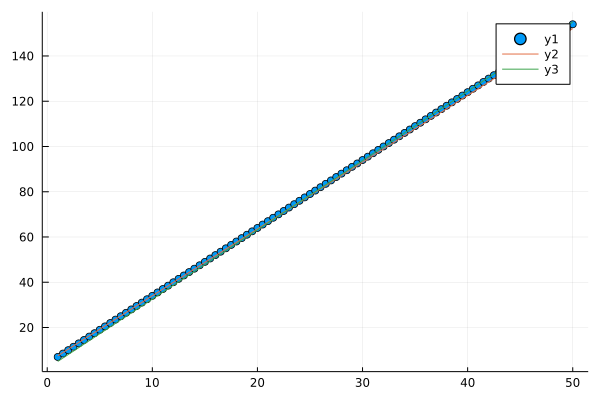

In [150]:
plot!(x,f.(x,w,b))

`f(3,4,5) = 4*3 + 5`

In [153]:
gradient((x,y,z)->f(x,y,z),3,4,5)

(4, 3, 1)

In [154]:
function forward(x,y,w,b)
    ŷ = f(x,w,b)
    l = loss(y,ŷ)
    return l
end

forward (generic function with 1 method)

In [157]:
w = rand(); b = rand();
η = 1e-5
while true
    net_loss = 0
    grad_w = 0
    grad_b = 0
    for i = 1:length(x)
        net_loss += forward(x[i],y[i],w,b)
        _,_,g_w,g_b = gradient((a,b,c,d)->forward(a,b,c,d),x[i],y[i],w,b)
        grad_w += g_w
        grad_b += g_b
    end
    w = w - η*grad_w/length(x)
    b = b - η*grad_b/length(x)
    net_loss = net_loss/length(x)
    println("Loss: ", net_loss)
    if net_loss < 1.5
        break
    end
end

Loss: 3804.2200645168455
Loss: 3739.4516854313274
Loss: 3675.786339313889
Loss: 3613.205241043669
Loss: 3551.6899254184077
Loss: 3491.222241706093
Loss: 3431.7843482894086
Loss: 3373.3587074013735
Loss: 3315.9280799506396
Loss: 3259.4755204349226
Loss: 3203.9843719410514
Loss: 3149.438261230178
Loss: 3095.821093906678
Loss: 3043.1170496693344
Loss: 2991.310577643393
Loss: 2940.386391792113
Loss: 2890.3294664064665
Loss: 2841.1250316716437
Loss: 2792.7585693090664
Loss: 2745.21580829262
Loss: 2698.4827206378386
Loss: 2652.5455172628
Loss: 2607.390643919515
Loss: 2563.0047771946074
Loss: 2519.3748205781003
Loss: 2476.4879005991575
Loss: 2434.331363027624
Loss: 2392.892769140275
Loss: 2352.159892050634
Loss: 2312.120713101304
Loss: 2272.763418317739
Loss: 2234.076394922405
Loss: 2196.048227908316
Loss: 2158.667696670909
Loss: 2121.923771697294
Loss: 2085.805611311877
Loss: 2050.3025584774145
Loss: 2015.4041376505447
Loss: 1981.1000516908641
Loss: 1947.380178822652
Loss: 1914.23456964834
L

Loss: 10.120428921879249
Loss: 9.967149198259195
Loss: 9.816479802481439
Loss: 9.668376279552426
Loss: 9.522794931566049
Loss: 9.37969280481005
Loss: 9.23902767709223
Loss: 9.100758045282337
Loss: 8.964843113065966
Loss: 8.831242778907438
Loss: 8.699917624217246
Loss: 8.570828901721192
Loss: 8.443938524027722
Loss: 8.319209052389771
Loss: 8.19660368565798
Loss: 8.076086249422259
Loss: 7.957621185338172
Loss: 7.841173540634958
Loss: 7.726708957802406
Loss: 7.614193664453427
Loss: 7.503594463358982
Loss: 7.394878722652937
Loss: 7.288014366203789
Loss: 7.182969864150223
Loss: 7.079714223597811
Loss: 6.978216979474335
Loss: 6.87844818554073
Loss: 6.780378405555106
Loss: 6.6839787045873065
Loss: 6.589220640481374
Loss: 6.496076255463366
Loss: 6.404518067892112
Loss: 6.31451906415046
Loss: 6.226052690674726
Loss: 6.139092846119677
Loss: 6.053613873657048
Loss: 5.969590553405331
Loss: 5.8869980949883765
Loss: 5.805812130220616
Loss: 5.726008705917068
Loss: 5.647564276825689
Loss: 5.5704556986

In [158]:
w,b

(3.0620258287008664, 0.9382142009890256)